In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os

In [2]:
# get the subfolders in root folder 

root_folder = r"X:\Projects\artistic-atlas-adventure/Resources" 
sub_folder_names = os.listdir(root_folder)

In [3]:
#empty list for dataframes
df_list = []

# make dataframes for each subfolder and label each image
for sub_folder_name in sub_folder_names:
    subfolder_path = os.path.join(root_folder, sub_folder_name)
    file_names = os.listdir(subfolder_path)
    df = pd.DataFrame(file_names, columns=['image_id'])
    df['label'] = sub_folder_name
    df_list.append(df)

# concat list of dataframes into one dataframe
concat_df = pd.concat(df_list)
concat_df

,image_id,label
0,0.jpg,buildings
1,10006.jpg,buildings
2,1001.jpg,buildings
3,10014.jpg,buildings
4,10018.jpg,buildings
...,...,...
2878,9961.jpg,street
2879,9967.jpg,street
2880,9978.jpg,street
2881,9989.jpg,street


In [4]:
#check if there are null values
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17034 entries, 0 to 2882
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  17034 non-null  object
 1   label     17034 non-null  object
dtypes: object(2)
memory usage: 399.2+ KB


In [5]:
# check that all image ids are unique
len(concat_df['image_id'].unique())

17034

In [6]:
# value couts for labels
concat_df['label'].value_counts()

label
mountain     3037
glacier      2957
street       2883
sea          2784
forest       2745
buildings    2628
Name: count, dtype: int64

<Axes: ylabel='label'>

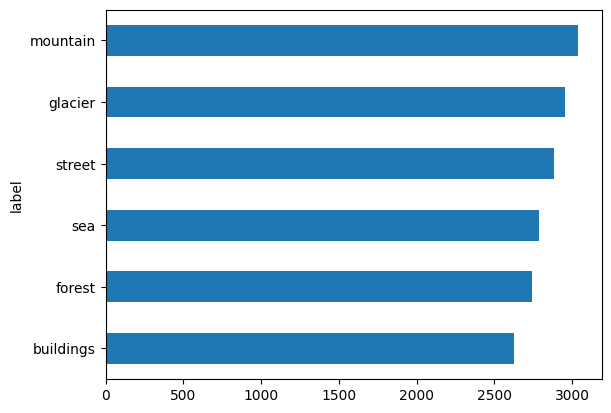

In [7]:
# graph value counts
concat_df['label'].value_counts().sort_values().plot.barh()

In [8]:
imgs = []

for row in concat_df.itertuples():
    file_path = os.path.join(root_folder, row.label, row.image_id)
    with Image.open(file_path) as img:
        imgs.append(img.copy())
    


In [9]:
sizes = set([img.size for img in imgs])
sizes

{(150, 72),
 (150, 76),
 (150, 81),
 (150, 97),
 (150, 100),
 (150, 102),
 (150, 103),
 (150, 105),
 (150, 108),
 (150, 110),
 (150, 111),
 (150, 113),
 (150, 115),
 (150, 119),
 (150, 120),
 (150, 123),
 (150, 124),
 (150, 131),
 (150, 133),
 (150, 134),
 (150, 135),
 (150, 136),
 (150, 140),
 (150, 141),
 (150, 142),
 (150, 143),
 (150, 144),
 (150, 145),
 (150, 146),
 (150, 147),
 (150, 149),
 (150, 150)}

In [10]:
img_size_count = {}

for img in imgs:
    if str(img.size) in img_size_count:
        img_size_count[str(img.size)] += 1
    else:
        img_size_count[str(img.size)] = 1

img_size_count

{'(150, 150)': 16979,
 '(150, 124)': 1,
 '(150, 113)': 7,
 '(150, 108)': 2,
 '(150, 133)': 1,
 '(150, 115)': 1,
 '(150, 135)': 3,
 '(150, 141)': 2,
 '(150, 136)': 2,
 '(150, 110)': 2,
 '(150, 105)': 1,
 '(150, 111)': 3,
 '(150, 120)': 1,
 '(150, 149)': 2,
 '(150, 143)': 2,
 '(150, 146)': 2,
 '(150, 134)': 2,
 '(150, 142)': 2,
 '(150, 123)': 2,
 '(150, 119)': 1,
 '(150, 102)': 1,
 '(150, 76)': 2,
 '(150, 72)': 1,
 '(150, 97)': 1,
 '(150, 144)': 2,
 '(150, 103)': 1,
 '(150, 131)': 2,
 '(150, 81)': 2,
 '(150, 100)': 1,
 '(150, 145)': 1,
 '(150, 147)': 1,
 '(150, 140)': 1}

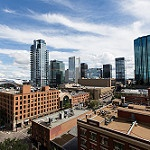

In [11]:
target_size = (150, 150)

resized_imgs = [img.resize(target_size, resample = Image.LANCZOS) for img in imgs]
resized_imgs[1]

In [12]:
sizes = set([img.size for img in resized_imgs])
sizes

{(150, 150)}